In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
def KMedoids(X):

  #Se configura el modelo K-Medoids
  XC=np.zeros((5,1))
  XC[:,0]=np.sort(np.random.uniform(low=np.min(X), high=np.max(X), size=5))

  for k in range(len(X)):
      nff=np.argmin(np.abs(XC[:,0]-X[k]))
      XC[nff,0]=(XC[nff,0]+X[k])/2

  XC=np.sort(XC)

  #Se procede con la configuración de la base de xcada cluster
  sigma=np.zeros((5,1))

  for k in range(5):
      sigma[k,0]=np.sum(np.abs(XC[:,]-XC[k,]))/4


  return XC,sigma

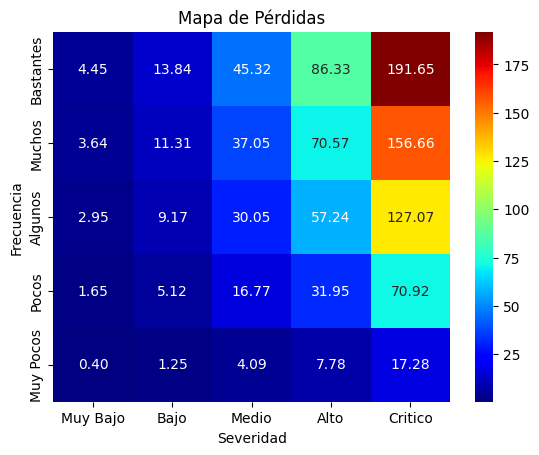

Los cluster para la frecuencia son:
['Bastantes', 'Muchos', 'Algunos', 'Pocos', 'Muy Pocos']
[[ 1.07267262  4.40324251  7.88916867  9.72687543 11.89905183]]
Los cluster para la severidad son:
['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Critico']
[[ 0.37394726  1.16281852  3.80911117  7.25507449 16.10639724]]


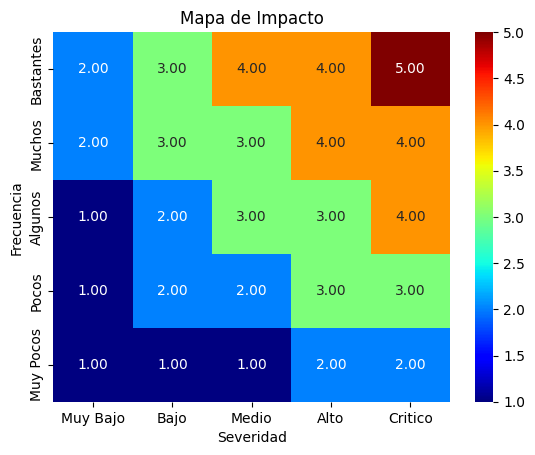

,Frecuencia,ClusterFrecuencia,Severidad,ClusterSeveridad,Impacto
0,1.0,0.0,0.5374,0.0,0.5374
1,4.0,1.0,1.1978,1.0,4.7912
2,5.0,1.0,0.4269,0.0,2.1345
3,6.0,1.0,1.0814,1.0,6.4884
4,7.0,2.0,1.2105,1.0,8.4735
...,...,...,...,...,...
696,1.0,0.0,0.5747,0.0,0.5747
697,6.0,1.0,0.7209,0.0,4.3254
698,10.0,3.0,0.3628,0.0,3.6280
699,4.0,1.0,0.2715,0.0,1.0860


In [9]:
nxl='/content/drive/MyDrive/Integración de datos y prospectiva/Parcial_2/5. FallasTecnológicas.xlsx'
XDB=pd.read_excel(nxl)
XDB.head()

#Modelamos la variable de Frecuencia - KMedoids
np.random.seed(42)
XCf=np.array(XDB.iloc[:,3])
X=XCf
XCf,sigmaf=KMedoids(X)
lbf=['Muy Pocos','Pocos','Algunos','Muchos','Bastantes']

#Modelamos la variable de Severidad
XCs=np.array(XDB.iloc[:,4])
X=XCs
XCs,sigmas=KMedoids(X)
lbs=['Muy Bajo','Bajo','Medio','Alto','Critico']

#Modelamos el mapa de pérdida
MP=np.outer(XCf,XCs)
MPo=MP[::-1,:]  #Quedaron ordenados
lbf=lbf[::-1]  #Labels ordenados

plt.figure()
sns.heatmap(MPo,annot=True,cmap='jet',fmt='.2f')
plt.xlabel('Severidad')
plt.xticks(np.arange(len(lbs))+0.5,lbs)
plt.ylabel('Frecuencia')
plt.yticks(np.arange(len(lbf))+0.5,lbf)
plt.title('Mapa de Pérdidas')
plt.show()

print('Los cluster para la frecuencia son:')
print(lbf)
print(XCf.transpose())
print('Los cluster para la severidad son:')
print(lbs)
print(XCs.transpose())

#Matriz de impacto - Cuales cuadritos tienen un mayor impacto para las finanzas de la organización
#Donde se tiene que tener un mayor enfaseis en la gestion de los reisgos
MI = np.zeros((5,5))
MI= np.array([[1,1,1,2,2],
 [1,2,2,3,3],
  [1,2,3,3,4],
   [2,3,3,4,4],
    [2,3,4,4,5]])

MIo=MI[::-1,:]

plt.figure()
sns.heatmap(MIo,annot=True,cmap='jet',fmt='.2f')
plt.xlabel('Severidad')
plt.xticks(np.arange(len(lbs))+0.5,lbs)
plt.ylabel('Frecuencia')
plt.yticks(np.arange(len(lbf))+0.5,lbf)
plt.title('Mapa de Impacto')
plt.show()

#Se clasifican los datos por cluster en frecuencia y en severidad
Xf= np.array(XDB.iloc[:,3])
Xs= np.array(XDB.iloc[:,4])
nCf=np.zeros((len(Xf),1)) #Que cluster es?
nCs=np.zeros((len(Xs),1)) #Que cluster es?
for k in range(len(Xf)):
  nCf[k]=np.argmin(np.abs(XCf-Xf[k]))
  nCs[k]=np.argmin(np.abs(XCs-Xs[k]))
tabla=np.column_stack((Xf,nCf,Xs,nCs,Xf*Xs))
df=pd.DataFrame(tabla)
df.columns = ["Frecuencia","ClusterFrecuencia","Severidad","ClusterSeveridad","Impacto"]
display(df)
df.to_excel('Clusters.xlsx')


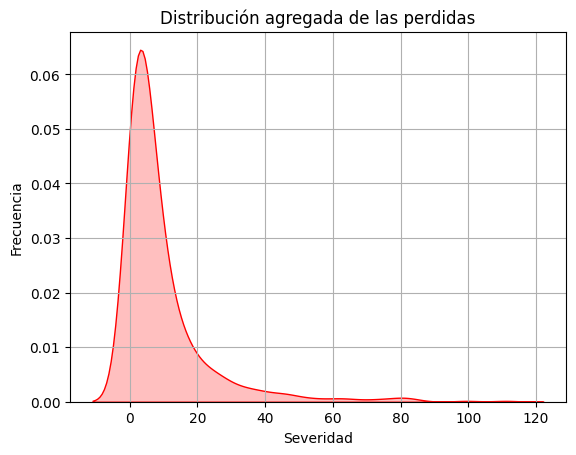

El costo de la poliza de aseguramiento de un puerto es:
102902.1000000008


,Media,Varianza,Asimetría,OpVar,NPE,NPNE,NPC
0,9.451113,13.707472,3.34836,102.9021,502.0,198.0,1.0


In [10]:
Xf=np.array(XDB.iloc[:,3])  #Frecuencia
Xs=np.array(XDB.iloc[:,4])  #Severidad
LDA=Xf*Xs

plt.figure()
sns.kdeplot(LDA,fill=True,color='red')
plt.xlabel('Severidad')
plt.ylabel('Frecuencia')
plt.title('Distribución agregada de las perdidas')
plt.grid()
plt.show()

#Se crea el vector para la presentación de resultados
pr=[]
#Parametros del Riesgo
pr.append(np.mean(LDA))
pr.append(np.std(LDA))
pr.append(skew(LDA))
#Pérdidas Esperadas - Cuantos pérdidas hay por debajo de la media
NPE=len(LDA[LDA<np.mean(LDA),])
#Cuantos hay por encima del OpVar
OpVar=np.percentile(LDA,99.9)
pr.append(OpVar)
print("El costo de la poliza de aseguramiento de un puerto es:")
print(OpVar*1000)
NPC=len(LDA[LDA>OpVar,])
#Cuantas son las pérdidas no esperadas
NPNE=len(LDA)-NPE-NPC
pr.append(NPE)
pr.append(NPNE)
pr.append(NPC)
pr=np.array(pr).reshape(1,7)
df=pd.DataFrame((pr))
df.columns = ["Media","Varianza","Asimetría","OpVar","NPE","NPNE","NPC"]
display(df)

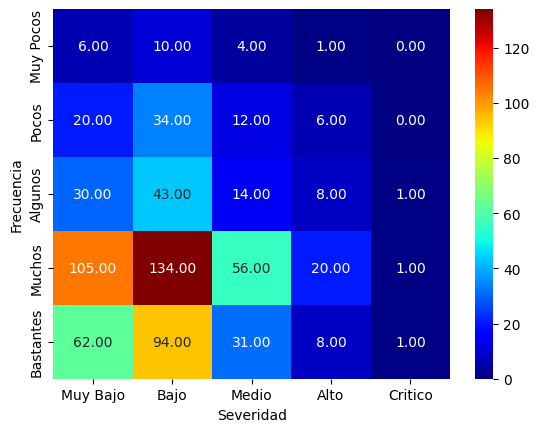

In [11]:
Mf=np.zeros((5,5,))


XDf=np.array(XDB.iloc[:,3]); XDs=np.array(XDB.iloc[:,4])

for k in range(len(XDf)):
  nff=np.argmin(np.abs(XCf[:,0]-XDf[k]))
  nfs=np.argmin(np.abs(XCs[:,0]-XDs[k]))
  Mf[nff,nfs]+=1

#Eventos de pérdida por celda
Mfo=Mf[::-1,:]
lbf=lbf[::-1]

plt.figure()
sns.heatmap(Mfo,annot=True,cmap='jet',fmt='.2f')
plt.xlabel('Severidad')
plt.xticks(np.arange(len(lbs))+0.5,lbs)
plt.ylabel('Frecuencia')
plt.yticks(np.arange(len(lbf))+0.5,lbf)
plt.show()

In [21]:
df1="/content/Clusters.xlsx"
df1=pd.read_excel(df1)
df1.head()

,Unnamed: 0,Frecuencia,ClusterFrecuencia,Severidad,ClusterSeveridad,Impacto
0,0,1,0,0.5374,0,0.5374
1,1,4,1,1.1978,1,4.7912
2,2,5,1,0.4269,0,2.1345
3,3,6,1,1.0814,1,6.4884
4,4,7,2,1.2105,1,8.4735


In [23]:
# Create a dataset with data having ClusterSeveridad equal to 2 and ClusterFrecuencia equal to 3
df_filtered = df1[(df1['ClusterSeveridad'] == 2) & (df1['ClusterFrecuencia'] == 3)]

# Display the filtered dataset
display(df_filtered)

,Unnamed: 0,Frecuencia,ClusterFrecuencia,Severidad,ClusterSeveridad,Impacto
16,16,9,3,3.2730,2,29.4570
89,89,10,3,4.2795,2,42.7950
246,246,9,3,4.5547,2,40.9923
258,258,10,3,3.5493,2,35.4930
328,328,9,3,3.5130,2,31.6170
438,438,10,3,2.4863,2,24.8630
454,454,9,3,5.0553,2,45.4977
523,523,10,3,3.9165,2,39.1650
543,543,10,3,4.4854,2,44.8540
562,562,9,3,4.4385,2,39.9465


In [24]:
# Get the original indices from the filtered DataFrame
original_indices = df_filtered['Unnamed: 0']

# Use these indices to select rows from the original XDB DataFrame
event_descriptions = XDB.loc[original_indices, 'Descripción Evento']

# Display the event descriptions
display(event_descriptions)

,Descripción Evento
16,"Degradación del rendimiento por varias horas, ..."
89,"Degradación del rendimiento por varias horas, ..."
246,"Degradación del rendimiento por varias horas, ..."
258,"Degradación del rendimiento por varias horas, ..."
328,"Degradación del rendimiento por varias horas, ..."
438,"Degradación del rendimiento por varias horas, ..."
454,Degradación severa del rendimiento por más de ...
523,"Degradación del rendimiento por varias horas, ..."
543,"Degradación del rendimiento por varias horas, ..."
562,"Degradación del rendimiento por varias horas, ..."


##**Análisis de Clúster (Severidad 2, Frecuencia 3):**

Los puntos de datos que pertenecen al clúster con Severidad 2 (“Media”) y Frecuencia 3 (“Muchos”) representan fallas tecnológicas que ocurren con frecuencia media y tienen un nivel de severidad medio. Como se observa en las descripciones de eventos filtradas, estos incidentes se relacionan principalmente con “Degradación del rendimiento durante varias horas”.
Aunque no son los más graves en términos de impacto inmediato (como una caída total del sistema), su frecuencia media significa que ocurren lo suficientemente a menudo como para representar una preocupación importante para la empresa. La naturaleza repetitiva de estos eventos sugiere la existencia de problemas subyacentes que provocan degradaciones de rendimiento recurrentes.

#Parámetros de Riesgo e Implicaciones Empresariales:

Los parámetros de riesgo calculados ofrecen una visión cuantitativa del perfil general de riesgo:

**Media (Promedio)**: La cual fue de 9,45 millones de dolares lo que indica una media bastante elevada en cuanto a dinero, sin embargo comparado con las posibilidades de perdida que tiene la fintech no se encuentra en un nivel tan elevado.

**Varianza:** Del 13,7 indica que la variabilidad de las perdidas es alta y que no existe una buena certeza de y manejo del control de perdidas en la empresa

Asimetría: Indica la forma de la distribución de las pérdidas. Una asimetría positiva (como la observada en los resultados) implica una distribución con una “cola larga” hacia la derecha, lo que significa una mayor probabilidad de experimentar unas pocas pérdidas muy grandes, incluso si la mayoría son pequeñas. Esto es crucial en la gestión del riesgo, ya que resalta el potencial de eventos significativos e inesperados.

OpVar (Operational Value at Risk) al 99.9%: Es una medida de la pérdida máxima esperada con un nivel de confianza determinado (en este caso, 99.9%). El valor calculado de aproximadamente 102.9 indica que, con un 99.9% de confianza, la pérdida agregada máxima no superará este valor.
El costo asociado de una póliza de seguro basada en este OpVar (102,902.10) puede servir como referencia para estrategias de transferencia de riesgo.

Número de Pérdidas Esperadas (NPE): Representa la cantidad de eventos con pérdidas inferiores a la media. Son las pérdidas más frecuentes y pequeñas, consideradas parte del curso normal del negocio las cuales hacen en mayor parte de las posibles perdidas.

Número de Pérdidas No Esperadas (NPNE): Son los eventos con pérdidas comprendidas entre la media y el OpVar. Ocurren con menor frecuencia que las esperadas y pueden tener un impacto más significativo, por lo que requieren seguimiento y gestión cuidadosa, en este caso la empresa debe de concentrarse en reducir este valor dado que representan una buena cantidad de las posibles perdidas.

Número de Pérdidas Catastróficas (NPC): Representa los eventos con pérdidas superiores al OpVar. Son raros, pero de alto impacto, y pueden tener consecuencias graves para la empresa. Identificar incluso un pequeño número de estos eventos (como el 1 detectado en el análisis) es esencial para desarrollar planes de contingencia sólidos.

